In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import seaborn as sb
from warnings import filterwarnings
filterwarnings("ignore")

In [141]:
df = pd.read_csv("forestFireCleanedDataSet.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [143]:
df.drop(["day", "month", "year"], axis = 1, inplace = True)

In [144]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [145]:
df["Classes"] = np.where(df["Classes"].str.contains("not fire"), 0, 1)

In [146]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [147]:
df.Classes.value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int32  
 11  region       243 non-null    int64  
dtypes: float64(7), int32(1), int64(4)
memory usage: 22.0 KB


# Separation of dataset

In [149]:
x = df.drop(df[["FWI"]], axis = 1)

In [150]:
y = df["FWI"]

In [151]:
x

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,1
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,2
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,2
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,2
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,2


In [152]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.15, random_state = 41)

In [155]:
xTrain.shape, xTest.shape

((206, 11), (37, 11))

In [156]:
yTrain.shape, yTest.shape

((206,), (37,))

# Feature selection

<AxesSubplot:>

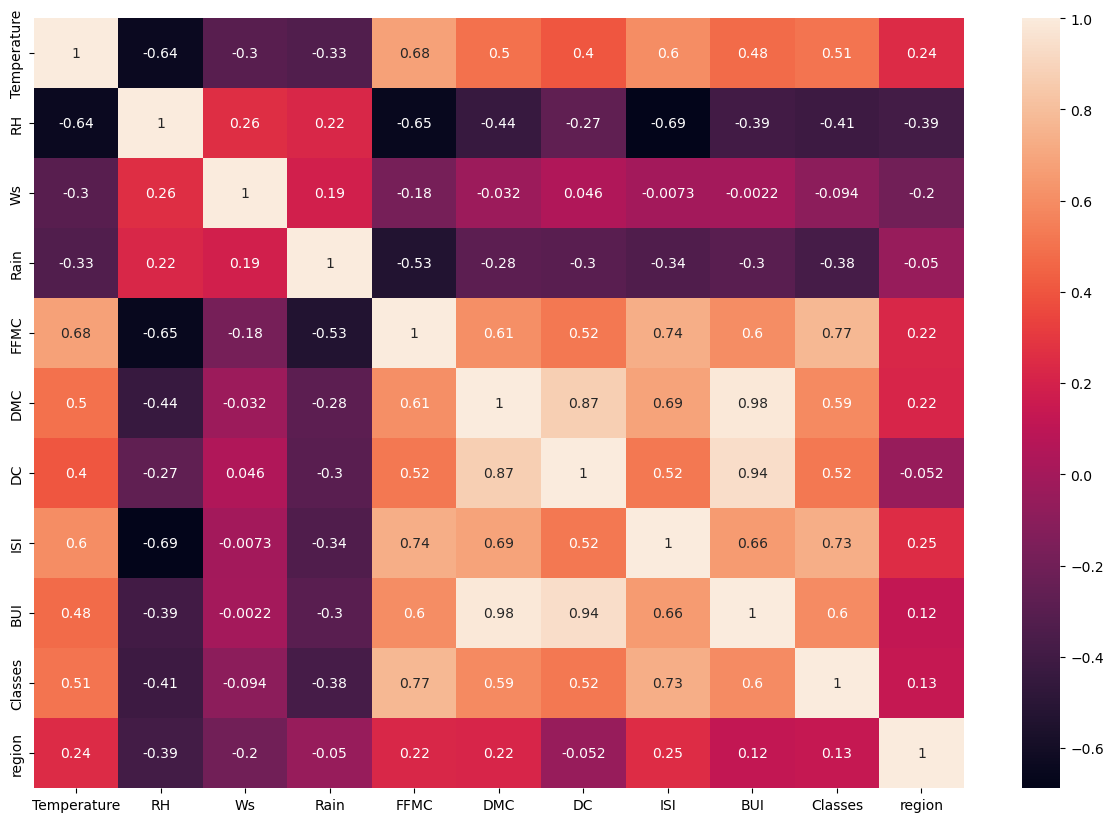

In [157]:
xTrain.corr()
mpl.figure(figsize = (15, 10))
sb.heatmap(xTrain.corr(), annot = True)

In [219]:
def correlation(dataSet, threshold):
    colCorr = set()
    colMatrix = xTrain.corr()
    for i in range(len(colMatrix.columns)):
        for j in range(i):
            if abs(colMatrix.iloc[i, j] > threshold):
                colName = colMatrix.columns[i]
                colCorr.add(colName)
    return colCorr

In [220]:
corrFeatures = correlation(xTrain, 0.85)
corrFeatures

set()

In [160]:
xTrain = xTrain.drop(corrFeatures, axis = 1)
xTest = xTest.drop(corrFeatures, axis = 1)

In [161]:
xTrain.shape, xTest.shape

((206, 9), (37, 9))

# Feature scaling

In [162]:
from sklearn.preprocessing import StandardScaler

In [163]:
scaler = StandardScaler()

In [164]:
xTrainScaled = scaler.fit_transform(xTrain)
xTestScaled = scaler.transform(xTest)

In [165]:
xTrainScaled

array([[-8.12841180e-01,  8.46916176e-01,  1.42207117e-01, ...,
        -4.51758124e-01,  8.98341552e-01, -9.71285862e-01],
       [ 8.15475997e-01, -7.44552305e-01, -9.04030960e-01, ...,
        -5.21817477e-01, -1.11316236e+00, -9.71285862e-01],
       [ 1.31740872e-03, -1.00979705e+00, -5.55284934e-01, ...,
        -6.85289300e-01, -1.11316236e+00, -9.71285862e-01],
       ...,
       [ 1.31740872e-03,  3.16426682e-01, -5.55284934e-01, ...,
        -8.72114241e-01, -1.11316236e+00,  1.02956301e+00],
       [ 1.08686219e+00, -1.20873061e+00, -9.04030960e-01, ...,
         8.32663343e-01,  8.98341552e-01,  1.02956301e+00],
       [ 2.17240698e+00, -2.07077604e+00, -2.06538908e-01, ...,
         2.77097210e+00,  8.98341552e-01,  1.02956301e+00]])

# Comparison between xtrain, xtest and xtrain scaled and xtest scaled

Text(0.5, 1.0, 'after Feature Scaling')

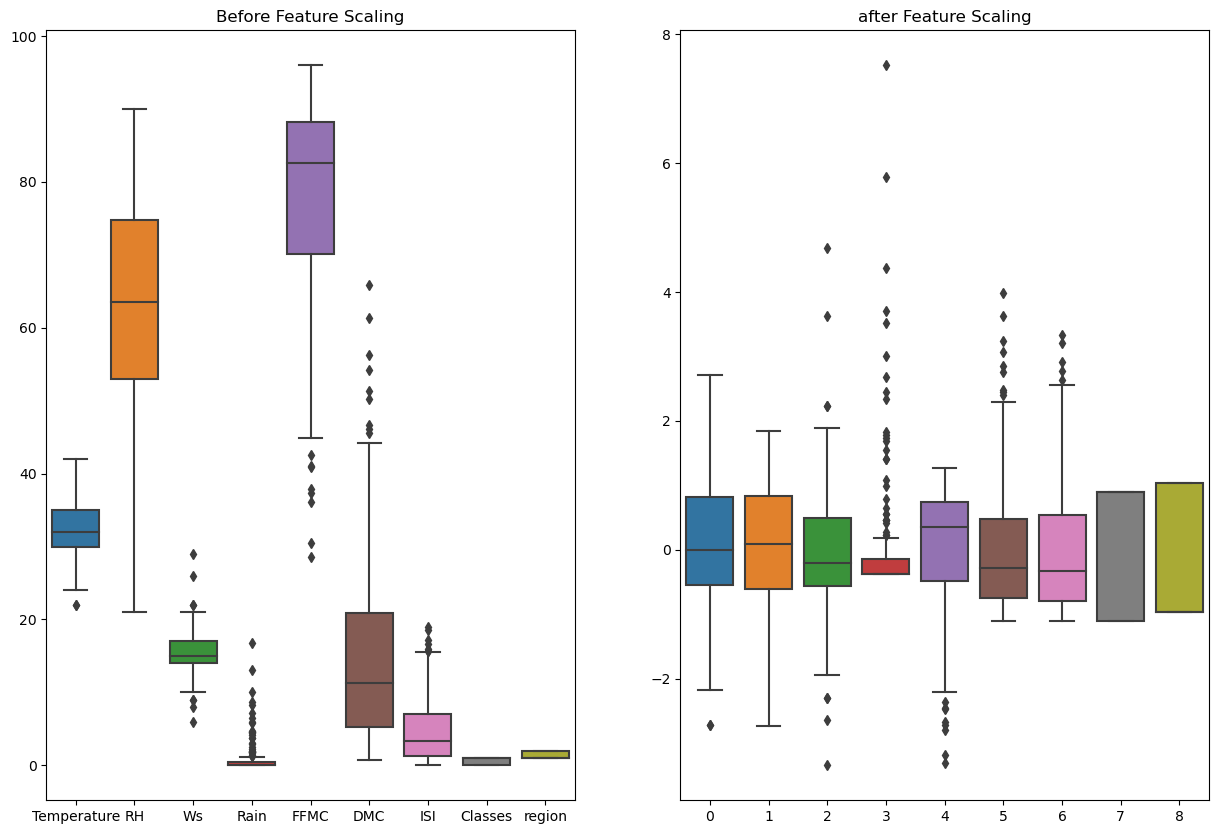

In [166]:
mpl.subplots(figsize = (15, 10))
mpl.subplot(1,2,1)
sb.boxplot(data = xTrain)
mpl.title("Before Feature Scaling")
mpl.subplot(1,2,2)
sb.boxplot(data = xTrainScaled)
mpl.title("after Feature Scaling")

# Linear regression

In [167]:
from sklearn.linear_model import LinearRegression

In [168]:
lRegressor = LinearRegression()

In [169]:
lRegressor.fit(xTrainScaled, yTrain)

LinearRegression()

In [170]:
yPredict = lRegressor.predict(xTestScaled)

In [171]:
yPredict

array([ 3.07828307, 14.03066452,  6.94029847, 15.10499519, -1.0315314 ,
        3.57486063,  0.56068756, 15.36577151,  1.56483505, 14.36690952,
        4.34249936, 10.99792351,  3.02760054,  6.6161221 , 12.4655902 ,
        4.50467209, -1.07774779, 11.81029499,  0.3082306 ,  6.65620604,
        6.11994606, 13.84167463,  4.17200483, 13.76954279,  0.1545561 ,
        0.88396093,  0.41148004, 16.49290644, 10.7444718 ,  0.23057196,
        0.50810143, 13.18538038,  1.57258904,  5.43645996,  1.32770249,
        9.90127914, 14.41325439])

In [172]:
yTest

42      3.4
55     15.3
153     6.4
156    15.0
123     0.2
160     3.1
144     0.8
195    15.7
9       0.9
181    14.5
51      2.8
57     11.3
219     3.2
238     6.5
29     12.9
118     4.1
124     0.1
71     12.1
107     0.8
146     6.7
128     6.0
197    14.8
46      3.6
235    15.2
14      0.1
63      0.8
30      0.4
87     13.2
191    10.7
188     0.6
223     1.2
169    13.0
117     1.7
158     5.2
38      0.6
155     9.9
165    14.1
Name: FWI, dtype: float64

In [173]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [174]:
mae = mean_absolute_error(yTest, yPredict)
rScore = r2_score(yTest, yPredict)

In [175]:
mae

0.527306019405215

In [224]:
rScore

0.958085922906081

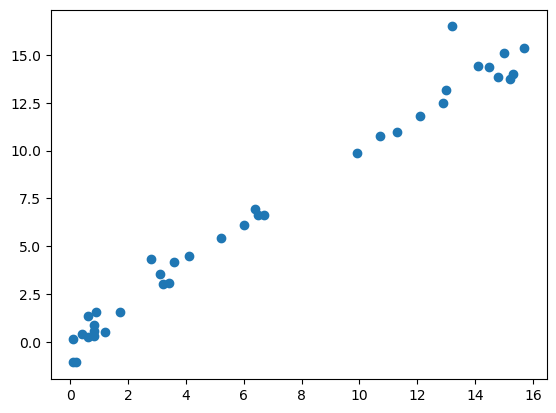

In [177]:
mpl.scatter(yTest, yPredict)

# Lasso regression

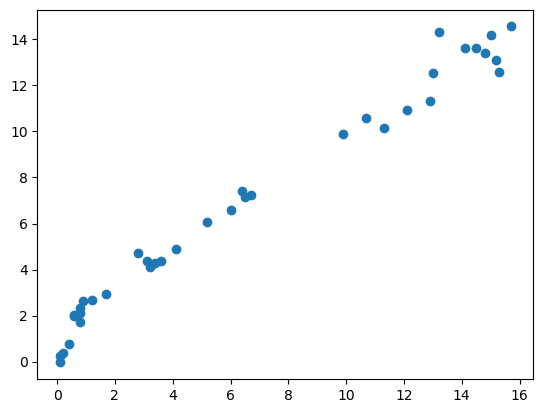

In [221]:
from sklearn.linear_model import Lasso
laRegressor = Lasso()
laRegressor.fit(xTrainScaled, yTrain)
yPredict = laRegressor.predict(xTestScaled)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mae = mean_absolute_error(yTest, yPredict)
rScore = r2_score(yTest, yPredict)
mae
rScore
mpl.scatter(yTest, yPredict)

In [180]:
mae

0.998352680225149

In [222]:
rScore

0.958085922906081

In [182]:
from sklearn.linear_model import LassoCV

In [187]:
lassoCv = LassoCV(cv = 5)

In [188]:
lassoCv.fit(xTrainScaled, yTrain)

LassoCV(cv=5)

0.9796678845765823

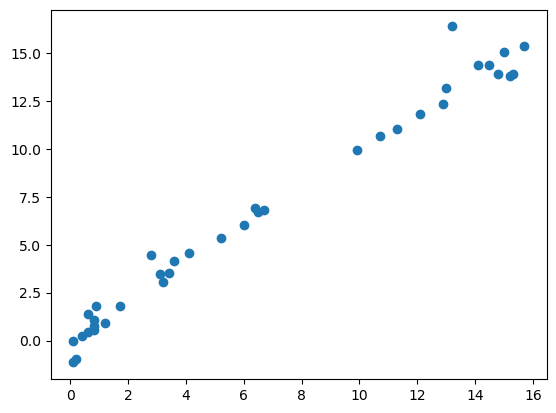

In [192]:
yPredict = lassoCv.predict(xTestScaled)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mae = mean_absolute_error(yTest, yPredict)
rScore = r2_score(yTest, yPredict)
mae
rScore
mpl.scatter(yTest, yPredict)
mae
rScore

# Ridge regression

In [198]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

MAE:  0.5378193844616477
R2 Score:  0.9789280568439589


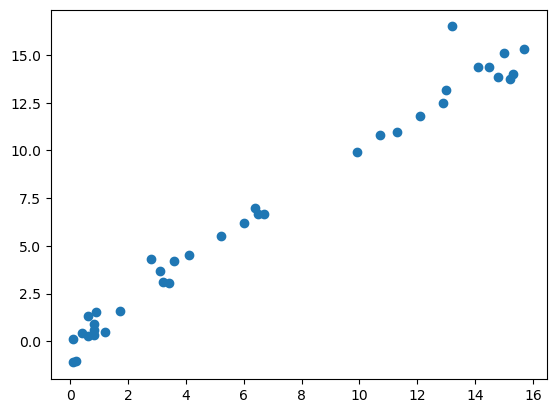

In [204]:
ridge = Ridge()
ridge.fit(xTrainScaled, yTrain)
yPredict = ridge.predict(xTestScaled)
mpl.scatter(yTest, yPredict)
mae = mean_absolute_error(yTest, yPredict)
score = r2_score(yTest, yPredict)
print("MAE: ", mae)
print("R2 Score: ", score)

In [209]:
from sklearn.linear_model import RidgeCV

MAE:  0.5378193844616477
R2 Score:  0.9789280568439589


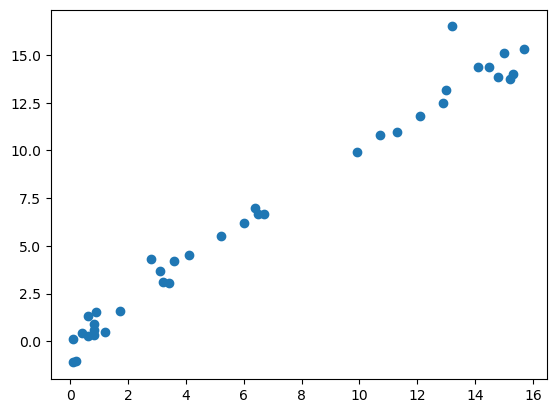

In [210]:
ridgecv = RidgeCV(cv = 5)
ridgecv.fit(xTrainScaled, yTrain)
yPredict = ridgecv.predict(xTestScaled)
mpl.scatter(yTest, yPredict)
mae = mean_absolute_error(yTest, yPredict)
score = r2_score(yTest, yPredict)
print("MAE: ", mae)
print("R2 Score: ", score)

# ElasticNet regression

In [212]:
from sklearn.linear_model import ElasticNet

MAE:  1.5150393427458078
R2 Score:  0.9050343117747761


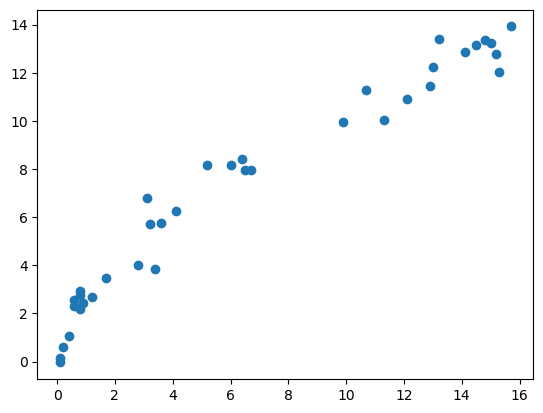

In [213]:
elasticnet = ElasticNet()
elasticnet.fit(xTrainScaled, yTrain)
yPredict = elasticnet.predict(xTestScaled)
mpl.scatter(yTest, yPredict)
mae = mean_absolute_error(yTest, yPredict)
score = r2_score(yTest, yPredict)
print("MAE: ", mae)
print("R2 Score: ", score)

In [214]:
from sklearn.linear_model import ElasticNetCV

MAE:  0.5633266360135801
R2 Score:  0.9780007250345877


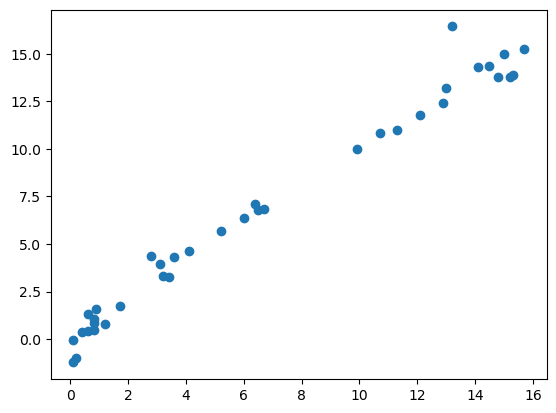

In [216]:
elasticnetcv = ElasticNetCV()
elasticnetcv.fit(xTrainScaled, yTrain)
yPredict = elasticnetcv.predict(xTestScaled)
mpl.scatter(yTest, yPredict)
mae = mean_absolute_error(yTest, yPredict)
score = r2_score(yTest, yPredict)
print("MAE: ", mae)
print("R2 Score: ", score)

In [225]:
import pickle

In [226]:
pickle.dump(scaler, open("scaler.pkl", "wb"))
pickle.dump(ridge, open("ridge.pkl", "wb"))